In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('bmh')
font = {'size'   : 16}

plt.rc('font', **font)

# Loading Users

In [4]:
def get_unique_users():
    list_of_users = []
    for file in os.listdir('../dirty_data/MLHD-SS-00'):
        if file != '.DS_Store':
            list_of_users += (os.listdir('../dirty_data/MLHD-SS-00/'+file))
    list_of_users.remove('.DS_Store')
    list_of_users = [i.strip('.txt.gz') for i in list_of_users]
    list_of_users = [i.strip('.txt.gz.icloud') for i in list_of_users]
    return(list_of_users)
print("Number of user histories stored:", len(get_unique_users()))

Number of user histories stored: 33070


In [5]:
user_demographic = pd.read_csv('../cleaned_data/MLHD_demographics.csv', '\t')
user_behaviour = pd.read_csv('../cleaned_data/MLHD_behavioural_features.csv', '\t')

all_users = user_demographic.merge(user_behaviour, on = 'uuid')

/Users/freddiewoods/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


# All User EDA

In [6]:
user_demographic.head()

,uuid,age,country,gender,playcount,age_scrobbles,user_type,registered,firstscrobble,lastscrobble
0,dfb7ea9d-6e4f-48e4-96f6-59abcc207d55,30.0,AT,n,42622,3783,user,1035849600,1138630578,1362652343
1,a89cb9c5-ba84-424e-8950-16657bb6f7af,35.0,US,m,182118,3862,subscrib,1035849600,1130274207,1369498564
2,dde6c339-c256-43f1-94e8-02f4043abdf9,35.0,UK,m,40668,3727,user,1035849600,1108340306,1357866969
3,44d70878-6e9a-432f-831d-179e8354f448,40.0,DK,n,74916,3874,user,1035849600,1368342035,1126011087
4,e553ab79-5e93-48fc-aa63-1c4319cafd23,NaN,SE,n,49383,3730,user,1035849600,1189263203,1357317882


In [7]:
user_demographic.shape

(582703, 10)

In [8]:
user_behaviour.head()

,uuid,exploratoryness_artist,exploratoryness_album,exploratoryness_track,mainstreamness_artist,mainstreamness_album,mainstreamness_track,genderedness_artist,genderedness_album,genderedness_track,fringeness_artist,fringeness_album,fringeness_track
0,dfb7ea9d-6e4f-48e4-96f6-59abcc207d55,0.963757,0.973318,0.993622,0.053435,0.006834,0.001015,-0.007852,-0.051894,-0.000223,0.044531,0.305007,0.164938
1,a89cb9c5-ba84-424e-8950-16657bb6f7af,0.975727,0.991706,0.998850,0.032591,0.002332,0.000295,0.008674,-0.023417,0.000077,0.057260,0.172970,0.099496
2,dde6c339-c256-43f1-94e8-02f4043abdf9,0.841347,0.920057,0.985308,0.076556,0.005797,0.000824,0.033450,-0.047393,0.000298,0.017065,0.172298,0.090022
3,44d70878-6e9a-432f-831d-179e8354f448,0.939690,0.944687,0.982072,0.046826,0.005068,0.000854,0.003506,-0.038450,-0.000072,0.060308,0.380346,0.258543
4,e553ab79-5e93-48fc-aa63-1c4319cafd23,0.956886,0.965266,0.994294,0.074928,0.007073,0.001064,0.002857,-0.065306,-0.000101,0.066298,0.383351,0.190572


In [9]:
user_behaviour.shape

(563293, 13)

In [10]:
all_users.shape

(544564, 22)

In [11]:
all_users = all_users.drop(columns = ['age_scrobbles', 'registered', 'firstscrobble', 'lastscrobble', 'user_type'])
all_users = all_users.dropna()
all_users.shape

(367571, 17)

In [12]:
all_users['uuid'].isin(get_unique_users()).sum()

14573

In [13]:
all_users = all_users.set_index('uuid')

In [14]:
all_users

,age,country,gender,playcount,exploratoryness_artist,exploratoryness_album,exploratoryness_track,mainstreamness_artist,mainstreamness_album,mainstreamness_track,genderedness_artist,genderedness_album,genderedness_track,fringeness_artist,fringeness_album,fringeness_track
uuid,,,,,,,,,,,,,,,,
dfb7ea9d-6e4f-48e4-96f6-59abcc207d55,30.0,AT,n,42622,0.963757,0.973318,0.993622,0.053435,0.006834,0.001015,-0.007852,-0.051894,-0.000223,0.044531,0.305007,0.164938
a89cb9c5-ba84-424e-8950-16657bb6f7af,35.0,US,m,182118,0.975727,0.991706,0.998850,0.032591,0.002332,0.000295,0.008674,-0.023417,0.000077,0.057260,0.172970,0.099496
dde6c339-c256-43f1-94e8-02f4043abdf9,35.0,UK,m,40668,0.841347,0.920057,0.985308,0.076556,0.005797,0.000824,0.033450,-0.047393,0.000298,0.017065,0.172298,0.090022
44d70878-6e9a-432f-831d-179e8354f448,40.0,DK,n,74916,0.939690,0.944687,0.982072,0.046826,0.005068,0.000854,0.003506,-0.038450,-0.000072,0.060308,0.380346,0.258543
cdcb50f8-da8e-4ec5-9623-b06f5e464ffb,34.0,FR,m,93689,0.841832,0.929254,0.982973,0.048757,0.003113,0.000521,0.008306,-0.038324,0.000041,0.207036,0.698940,0.625570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5c4d3290-4513-4087-a42a-98cb2ca52f72,19.0,PL,f,29205,0.825774,0.933441,0.981544,0.270066,0.021767,0.002965,0.000192,-0.253010,-0.000422,0.019346,0.199658,0.090704
720c2cb3-248c-4c38-bae9-e2dab22840e4,20.0,US,n,13799,0.847650,0.818133,0.953326,0.122890,0.013213,0.001797,-0.001879,-0.111475,-0.000161,0.119356,0.500254,0.362345
d65baf1a-62bf-4b73-b394-e2ad0c15dce5,26.0,BR,m,53667,0.876614,0.880717,0.975107,0.066992,0.005856,0.001023,-0.021183,-0.076039,-0.000401,0.083478,0.638362,0.404084


In [15]:
user_with_history = all_users[all_users.index.isin(get_unique_users())]

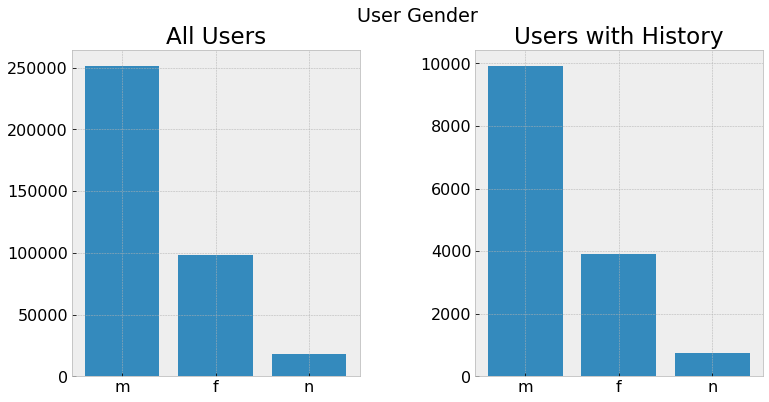

In [16]:
def plot_gender(all_users, users_with_history, column):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    f.suptitle('User Gender')
    all_values = all_users[column].value_counts()
    history_values = users_with_history[column].value_counts()
    ax1.bar(all_values.index, all_values)
    ax1.set_title("All Users")
    ax2.bar(history_values.index, history_values)
    ax2.set_title("Users with History")
    plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()

plot_gender(all_users, user_with_history, 'gender')

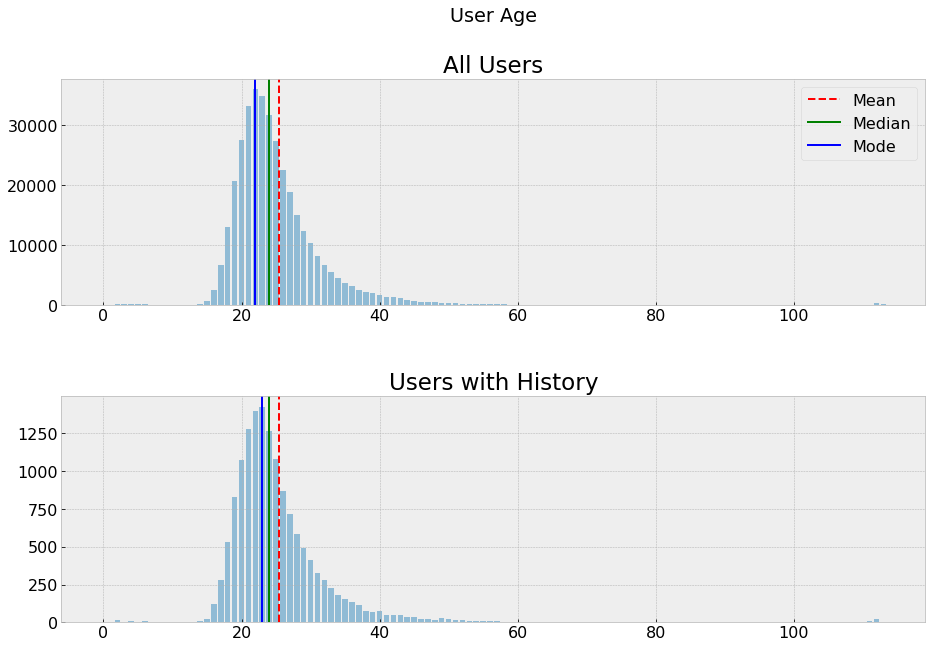

In [17]:
def plot_age_bar(all_users, users_with_history, column):
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    f.suptitle('User Age')
    all_values = all_users[column].value_counts()
    history_values = users_with_history[column].value_counts()
    
    ax1.set_title("All Users")
    ax1.bar(all_values.index, all_values, alpha = 0.5)
    ax1.axvline(all_users[column].mean(), color='r', linestyle='--', label = "Mean")
    ax1.axvline(all_users[column].median(), color='g', linestyle='-', label = "Median")
    ax1.axvline(all_users[column].mode().values[0], color='b', linestyle='-', label = "Mode")
    
    ax2.set_title("Users with History")
    ax2.bar(history_values.index, history_values,alpha = 0.5)
    ax2.axvline(users_with_history[column].mean(), color='r', linestyle='--')
    ax2.axvline(users_with_history[column].median(), color='g', linestyle='-')
    ax2.axvline(users_with_history[column].mode().values[0], color='b', linestyle='-')
    plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    ax1.legend()
    plt.savefig('../../figures/user_age.png')
    plt.show()

plot_age_bar(all_users, user_with_history, 'age')

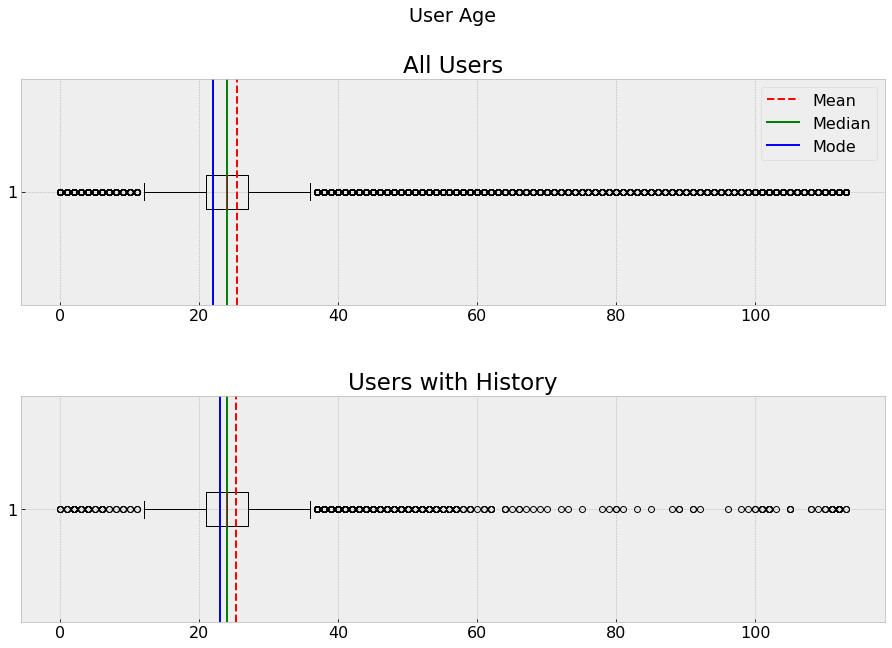

In [18]:
def plot_age_box(all_users, users_with_history, column):
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    f.suptitle('User Age')

    ax1.set_title("All Users")
    ax1.boxplot(all_users[column], vert = False)
    ax1.axvline(all_users[column].mean(), color='r', linestyle='--', label = "Mean")
    ax1.axvline(all_users[column].median(), color='g', linestyle='-', label = "Median")
    ax1.axvline(all_users[column].mode().values[0], color='b', linestyle='-', label = "Mode")
    
    ax2.set_title("Users with History")
    ax2.boxplot(users_with_history[column], vert = False)
    ax2.axvline(users_with_history[column].mean(), color='r', linestyle='--')
    ax2.axvline(users_with_history[column].median(), color='g', linestyle='-')
    ax2.axvline(users_with_history[column].mode().values[0], color='b', linestyle='-')
    plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    ax1.legend()
    plt.show()

plot_age_box(all_users, user_with_history, 'age')

In [19]:
count = user_with_history[user_with_history['age'] <= 35]
count[count['age'] >= 18]['age'].count()/14573

0.9005009263706855

Users have a wide range of age, remove anyone over 40 years old anyone too young.

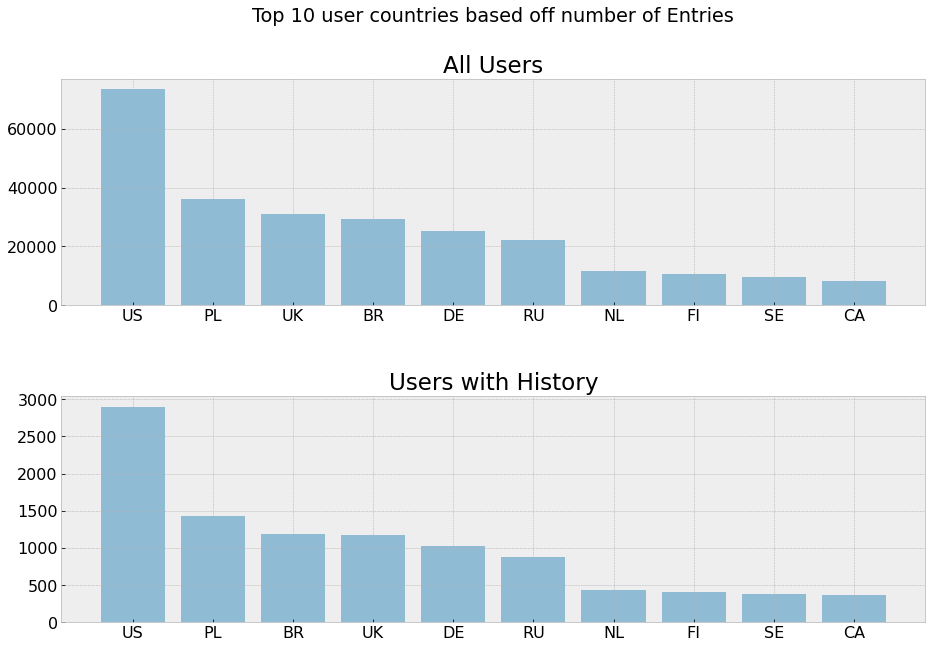

In [20]:
def plot_country(all_users, users_with_history, column):
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    f.suptitle('Top 10 user countries based off number of Entries')
    
    all_values = all_users[column].value_counts()[:10]
    history_values = users_with_history[column].value_counts()[:10]
    
    ax1.set_title("All Users")
    ax1.bar(all_values.index, all_values, alpha = 0.5)

    
    ax2.set_title("Users with History")
    ax2.bar(history_values.index, history_values,alpha = 0.5)
    
    plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()

plot_country(all_users, user_with_history, 'country')

In [21]:
all_users["country"].value_counts()[:10]
user_with_history["country"].value_counts()[:10]

US    2900
PL    1432
BR    1184
UK    1170
DE    1028
RU     872
NL     437
FI     413
SE     375
CA     363
Name: country, dtype: int64

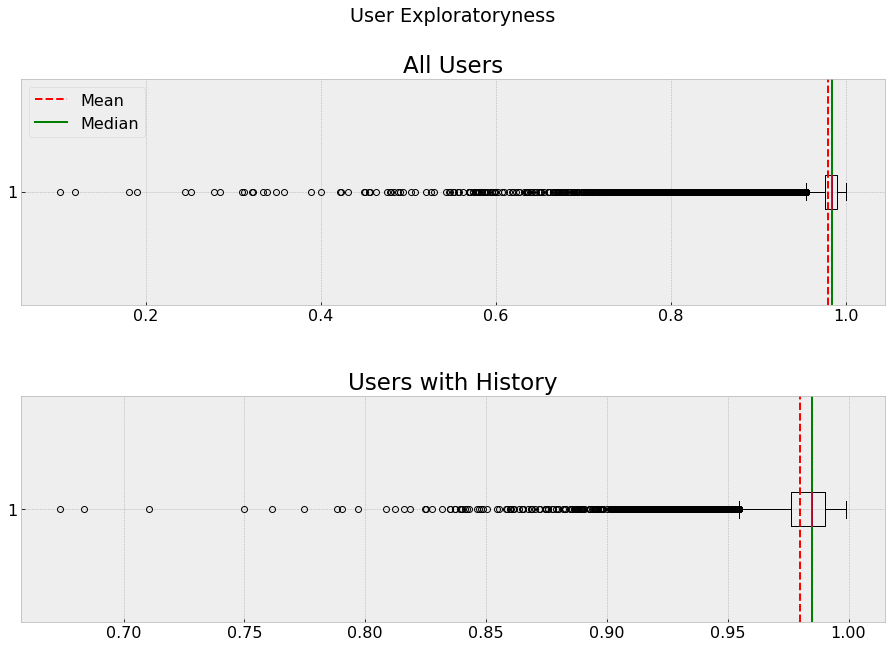

In [22]:
def plot_exploratoryness(all_users, users_with_history):
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    f.suptitle('User Exploratoryness')

    ax1.set_title("All Users")
    ax1.boxplot(all_users['exploratoryness_track'], vert = False)
    ax1.axvline(all_users['exploratoryness_track'].mean(), color='r', linestyle='--', label = "Mean")
    ax1.axvline(all_users['exploratoryness_track'].median(), color='g', linestyle='-', label = "Median")
    
    ax2.set_title("Users with History")
    ax2.boxplot(users_with_history['exploratoryness_track'], vert = False)
    ax2.axvline(users_with_history['exploratoryness_track'].mean(), color='r', linestyle='--')
    ax2.axvline(users_with_history['exploratoryness_track'].median(), color='g', linestyle='-')
    plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    ax1.legend()
    plt.show()

plot_exploratoryness(all_users, user_with_history)

In [23]:
print(all_users['exploratoryness_track'].quantile(0.1))
print(all_users['exploratoryness_track'].quantile(1))

0.962050204382889
0.999898679122364


In [24]:
print(user_with_history['exploratoryness_track'].quantile(0.1))
print(user_with_history['exploratoryness_track'].quantile(1))

0.962531357910412
0.998829638163595


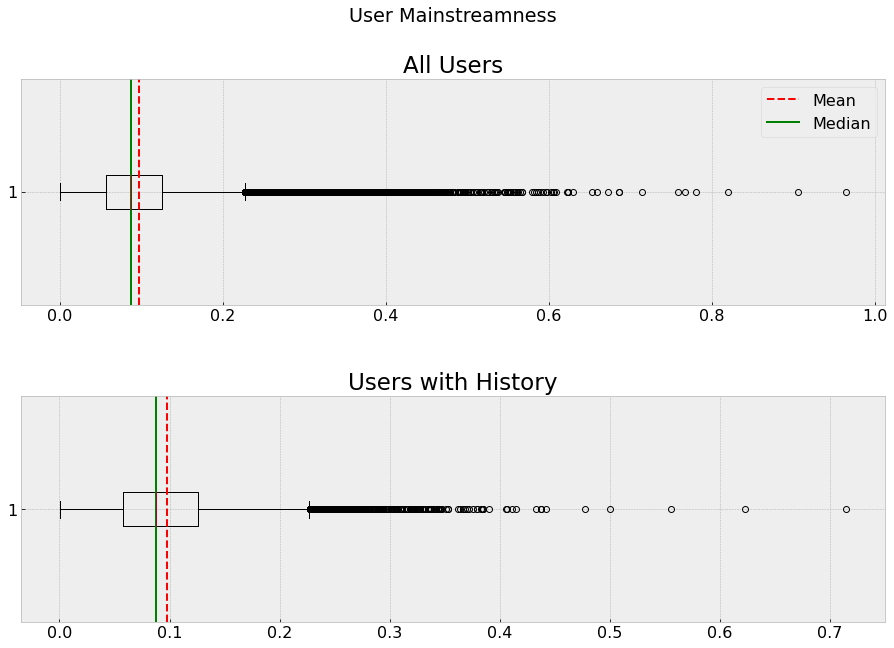

In [25]:
def plot_mainstreamness(all_users, users_with_history):
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    f.suptitle('User Mainstreamness')

    ax1.set_title("All Users")
    ax1.boxplot(all_users['mainstreamness_artist'], vert = False)
    ax1.axvline(all_users['mainstreamness_artist'].mean(), color='r', linestyle='--', label = "Mean")
    ax1.axvline(all_users['mainstreamness_artist'].median(), color='g', linestyle='-', label = "Median")
    
    ax2.set_title("Users with History")
    ax2.boxplot(users_with_history['mainstreamness_artist'], vert = False)
    ax2.axvline(users_with_history['mainstreamness_artist'].mean(), color='r', linestyle='--')
    ax2.axvline(users_with_history['mainstreamness_artist'].median(), color='g', linestyle='-')
    plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    ax1.legend()
    plt.show()

plot_mainstreamness(all_users, user_with_history)

In [26]:
print(user_with_history['mainstreamness_artist'].quantile(0))
print(user_with_history['mainstreamness_artist'].quantile(0.99))

0.0007094033443307
0.27912921514716504


In [27]:
user_with_history

,age,country,gender,playcount,exploratoryness_artist,exploratoryness_album,exploratoryness_track,mainstreamness_artist,mainstreamness_album,mainstreamness_track,genderedness_artist,genderedness_album,genderedness_track,fringeness_artist,fringeness_album,fringeness_track
uuid,,,,,,,,,,,,,,,,
019b345a-cf6d-44e3-8a2a-540457a7e352,34.0,FR,m,67674,0.972862,0.982895,0.997757,0.018967,0.003149,0.000368,0.005516,-0.011248,0.000059,0.087523,0.398440,0.307415
a835505f-f948-4f03-b60f-16862d83db64,56.0,US,m,63414,0.961778,0.986985,0.997545,0.030396,0.002069,0.000283,0.010904,-0.020058,0.000071,0.064970,0.347494,0.225912
e378b282-e7ed-4bf4-b5ef-1d19b2f174ee,47.0,US,f,39915,0.975477,0.979173,0.989580,0.026055,0.002651,0.000361,0.002495,-0.020916,-0.000046,0.194488,0.538620,0.450182
a1817e92-b4aa-4258-85b3-c77661257028,44.0,DE,m,24931,0.947961,0.974884,0.994229,0.057277,0.004809,0.000616,0.007567,-0.046235,-0.000022,0.076170,0.383900,0.211544
e443c898-f594-410e-9ead-c4c2cdc0f9d3,26.0,US,m,81001,0.877179,0.940407,0.990745,0.091009,0.009397,0.001037,0.038385,-0.053407,0.000370,0.069604,0.391785,0.297799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6e2afcf9-8a0d-4032-84f9-e8264a18d304,20.0,PL,m,10828,0.775074,0.833573,0.925790,0.160560,0.012590,0.001506,0.117439,-0.069314,0.000824,0.012006,0.365719,0.091522
e8bd22fc-d1ec-44ec-b784-0fd56d25857b,21.0,BR,m,23524,0.876496,0.923229,0.987446,0.163618,0.011902,0.001498,0.018356,-0.138829,-0.000191,0.040809,0.415576,0.181517
b8e3f35a-a565-40aa-a85b-615a16945b24,19.0,SE,f,14757,0.790932,0.833074,0.968796,0.100072,0.011982,0.002088,-0.038524,-0.116138,-0.000921,0.076777,0.303653,0.190350


In [28]:
all_users.columns

Index(['age', 'country', 'gender', 'playcount', 'exploratoryness_artist',
       'exploratoryness_album', 'exploratoryness_track',
       'mainstreamness_artist', 'mainstreamness_album', 'mainstreamness_track',
       'genderedness_artist', 'genderedness_album', 'genderedness_track',
       'fringeness_artist', 'fringeness_album', 'fringeness_track'],
      dtype='object')

In [29]:
user_with_history = user_with_history.dropna()

In [34]:
whitelist_mask_1 = ((user_with_history['age'] <= 35)
                  &  (user_with_history['exploratoryness_track'] <= 1)        
                  &  (user_with_history['mainstreamness_artist'] <= 0.28))

 
                    
user_whitelist_temp = user_with_history[whitelist_mask_1]
whitelist_mask_2 = ((user_whitelist_temp['age'] >= 18)
                  &  (user_whitelist_temp['exploratoryness_track'] >= 0.96) )      
user_whitelist = user_whitelist_temp[whitelist_mask_2]

In [35]:
user_whitelist

,age,country,gender,playcount,exploratoryness_artist,exploratoryness_album,exploratoryness_track,mainstreamness_artist,mainstreamness_album,mainstreamness_track,genderedness_artist,genderedness_album,genderedness_track,fringeness_artist,fringeness_album,fringeness_track
uuid,,,,,,,,,,,,,,,,
019b345a-cf6d-44e3-8a2a-540457a7e352,34.0,FR,m,67674,0.972862,0.982895,0.997757,0.018967,0.003149,0.000368,0.005516,-0.011248,0.000059,0.087523,0.398440,0.307415
e443c898-f594-410e-9ead-c4c2cdc0f9d3,26.0,US,m,81001,0.877179,0.940407,0.990745,0.091009,0.009397,0.001037,0.038385,-0.053407,0.000370,0.069604,0.391785,0.297799
0d428a7f-4406-44c0-a4a5-0e1d01dfcc64,32.0,AU,m,49312,0.911380,0.919999,0.981498,0.037666,0.005019,0.000609,0.009465,-0.024768,0.000101,0.084624,0.492294,0.313920
3569eadf-8633-4d3c-8f10-b831ee77422b,26.0,CA,m,117474,0.841494,0.918229,0.986476,0.123276,0.009209,0.001341,0.025967,-0.093784,0.000239,0.029445,0.157243,0.105266
a3202c55-832f-4a92-96b2-2d6309ef33a4,29.0,UK,m,65016,0.947537,0.964244,0.991677,0.079189,0.007386,0.000941,0.007151,-0.065852,0.000020,0.034945,0.267550,0.117525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec4c58a7-8693-43e8-af28-f7bc02e8aad2,24.0,RS,m,41710,0.788148,0.927433,0.982065,0.063877,0.005289,0.000685,0.038182,-0.029575,0.000329,0.072716,0.276888,0.378231
aa48b432-f705-4adb-8623-96ea75f81e93,18.0,PT,m,15786,0.762450,0.853259,0.971361,0.168241,0.019633,0.002561,-0.042492,-0.181035,-0.000831,0.006398,0.304384,0.079311
164d5b25-33f8-4daf-a981-89eb2f9b562a,18.0,PL,f,25905,0.750415,0.888110,0.970163,0.185013,0.015221,0.002368,-0.013037,-0.185593,-0.000684,0.009573,0.232040,0.129550


In [31]:
user_whitelist.to_pickle('../../cleaned_data/users.pkl')

NameError: name 'user_whitelist' is not defined

In [36]:
import numpy as np
np.mean(user_whitelist['playcount'])

50860.546011240665

In [38]:
uk_data = pd.read_pickle('../cleaned_data/uk_data.pkl')
us_data = pd.read_pickle('../cleaned_data/us_data.pkl')
pl_data = pd.read_pickle('../cleaned_data/pl_data.pkl')

In [46]:
np.mean(uk_data.groupby('userID').sum('count')['count']) + np.mean(us_data.groupby('userID').sum('count')['count']) + np.mean(pl_data.groupby('userID').sum('count')['count'])

49603.67716186785

In [47]:
49603.67716186785/3

16534.55905395595